In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import statsmodels.api as sm # import statsmodels 
from sklearn import linear_model
from scipy import stats
import seaborn as sns
from scipy.stats import ttest_1samp

In [3]:
df = pd.read_csv('full.csv')
df = df[df['isMainSleep'] == 1]
df['week_start'] = pd.to_datetime(df['dataDate']).dt.to_period('W').apply(lambda r: r.start_time)

In [4]:
df = df[['participID', 'dataDate', 'efficiency', 'minsAsleep', 'week_start']]
df

,participID,dataDate,efficiency,minsAsleep,week_start
0,3LZGLG,2015-08-25,97,423,2015-08-24
1,3LZGLG,2015-08-26,96,417,2015-08-24
2,3LZGLG,2015-08-27,95,431,2015-08-24
3,3LZGLG,2015-08-28,97,339,2015-08-24
4,3LZGLG,2015-08-29,90,376,2015-08-24
...,...,...,...,...,...
39459,4GM577,2016-05-02,91,385,2016-05-02
39460,4GM577,2016-05-03,91,379,2016-05-02
39461,4GM577,2016-05-04,89,622,2016-05-02
39462,4GM577,2016-05-05,93,380,2016-05-02


In [5]:
avg= df.groupby(['participID', 'week_start'], as_index=False).mean()
avgavg = avg.groupby('week_start', as_index=False).mean()
avgavg

,week_start,efficiency,minsAsleep
0,2015-08-24,94.002364,407.657329
1,2015-08-31,93.568880,382.279343
2,2015-09-07,93.882217,376.346305
3,2015-09-14,93.502545,371.877258
4,2015-09-21,93.392580,381.062655
5,2015-09-28,92.850250,380.105145
6,2015-10-05,93.131221,383.529896
7,2015-10-12,93.200685,361.368379
8,2015-10-19,92.995135,439.293028
9,2015-10-26,93.068998,384.328655


In [6]:
s = avg.pivot(index='participID', columns='week_start', values='minsAsleep').reset_index()

In [7]:
e = avg.pivot(index='participID', columns='week_start', values='efficiency').reset_index()
e.head()

week_start,participID,2015-08-24 00:00:00,2015-08-31 00:00:00,2015-09-07 00:00:00,2015-09-14 00:00:00,2015-09-21 00:00:00,2015-09-28 00:00:00,2015-10-05 00:00:00,2015-10-12 00:00:00,2015-10-19 00:00:00,...,2016-02-29 00:00:00,2016-03-07 00:00:00,2016-03-14 00:00:00,2016-03-21 00:00:00,2016-03-28 00:00:00,2016-04-04 00:00:00,2016-04-11 00:00:00,2016-04-18 00:00:00,2016-04-25 00:00:00,2016-05-02 00:00:00
0,3LZGLG,95.50,96.142857,97.142857,95.428571,96.714286,95.714286,95.000000,95.428571,96.00,...,97.285714,95.666667,94.000000,95.142857,92.571429,94.857143,95.428571,93.571429,92.714286,94.00
1,3LZJFK,94.20,95.142857,95.571429,92.600000,95.142857,93.714286,93.000000,94.000000,92.00,...,96.000000,95.142857,94.833333,95.428571,94.571429,94.000000,96.000000,93.857143,93.333333,NaN
2,3LZRZQ,NaN,96.000000,94.000000,95.000000,93.285714,92.571429,93.571429,92.142857,94.25,...,95.200000,94.000000,94.571429,96.333333,94.428571,95.333333,96.571429,94.857143,95.857143,94.40
3,3M29ZH,98.00,97.142857,98.400000,97.000000,97.666667,81.500000,97.750000,97.833333,97.60,...,98.400000,98.750000,97.600000,97.000000,99.200000,98.500000,98.750000,98.142857,97.800000,97.75
4,3M2QNS,94.25,93.166667,94.500000,91.857143,92.600000,92.000000,91.600000,90.571429,86.50,...,93.833333,92.800000,93.285714,94.428571,94.000000,92.500000,93.250000,94.142857,93.800000,93.50


/Users/mollygiglia/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


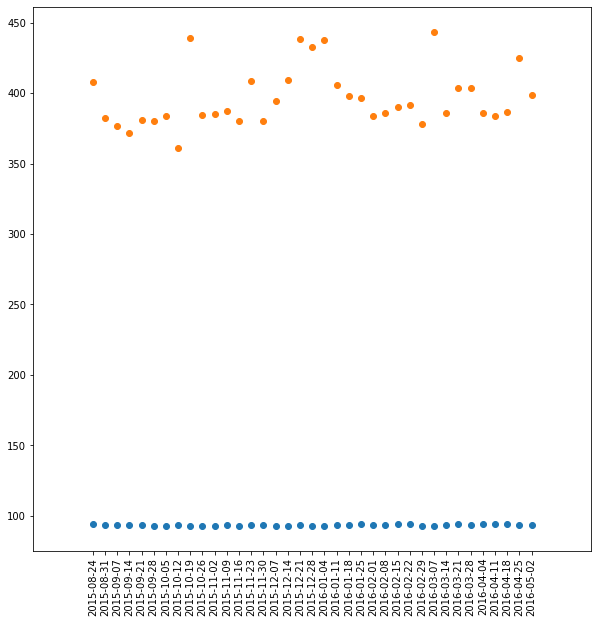

In [8]:
plt.figure(figsize=(10, 10));
plt.scatter(avgavg['week_start'], avgavg['efficiency'])
plt.scatter(avgavg['week_start'], avgavg['minsAsleep'])
plt.xticks(avgavg['week_start']);
plt.xticks(rotation=90);

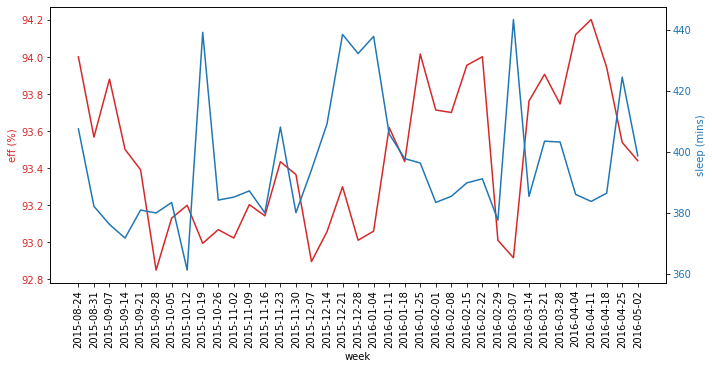

In [9]:
fig, ax1 = plt.subplots(figsize=(10,5))
color = 'tab:red'
ax1.set_xlabel('week')
ax1.set_ylabel('eff (%)', color=color)
ax1.plot(avgavg['week_start'], avgavg['efficiency'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=90);

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('sleep (mins)', color=color)  # we already handled the x-label with ax1
ax2.plot(avgavg['week_start'],avgavg['minsAsleep'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.xticks(avgavg['week_start']);


In [10]:
avgavg = avgavg.sort_values('week_start')
avgavg

,week_start,efficiency,minsAsleep
0,2015-08-24,94.002364,407.657329
1,2015-08-31,93.568880,382.279343
2,2015-09-07,93.882217,376.346305
3,2015-09-14,93.502545,371.877258
4,2015-09-21,93.392580,381.062655
5,2015-09-28,92.850250,380.105145
6,2015-10-05,93.131221,383.529896
7,2015-10-12,93.200685,361.368379
8,2015-10-19,92.995135,439.293028
9,2015-10-26,93.068998,384.328655


In [11]:
avgavg['rolling_efficiency'] = avgavg.iloc[:,1].rolling(window=3).mean()
avgavg['rolling_minsAsleep'] = avgavg.iloc[:,2].rolling(window=3).mean()

In [12]:
avgavg

,week_start,efficiency,minsAsleep,rolling_efficiency,rolling_minsAsleep
0,2015-08-24,94.002364,407.657329,NaN,NaN
1,2015-08-31,93.568880,382.279343,NaN,NaN
2,2015-09-07,93.882217,376.346305,93.817820,388.760992
3,2015-09-14,93.502545,371.877258,93.651214,376.834302
4,2015-09-21,93.392580,381.062655,93.592447,376.428739
5,2015-09-28,92.850250,380.105145,93.248458,377.681686
6,2015-10-05,93.131221,383.529896,93.124683,381.565899
7,2015-10-12,93.200685,361.368379,93.060718,375.001140
8,2015-10-19,92.995135,439.293028,93.109014,394.730434
9,2015-10-26,93.068998,384.328655,93.088273,394.996687


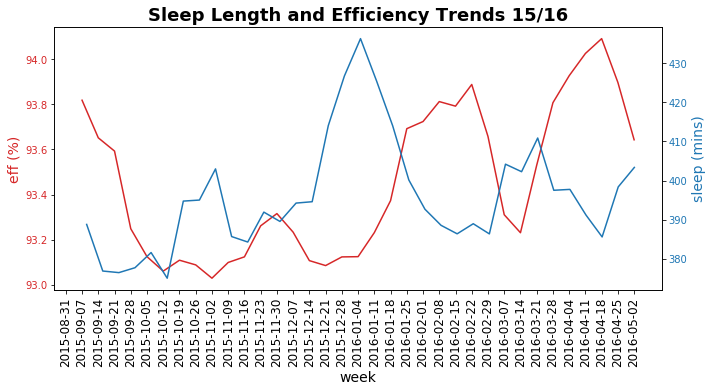

In [29]:
fig, ax1 = plt.subplots(figsize=(10,5))
color = 'tab:red'
ax1.set_xlabel('week', fontsize=14);
ax1.set_ylabel('eff (%)', color=color, fontsize=14);
ax1.plot(avgavg['week_start'], avgavg['rolling_efficiency'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=90, fontsize=12);

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('sleep (mins)', color=color, fontsize=14);  # we already handled the x-label with ax1
ax2.plot(avgavg['week_start'],avgavg['rolling_minsAsleep'], color=color);
ax2.tick_params(axis='y', labelcolor=color);

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.xticks(avgavg['week_start']);
plt.title('Sleep Length and Efficiency Trends 15/16', fontsize=18, fontweight="bold");
plt.savefig('Figure7', dpi=300, bbox_inches="tight")